# Predictive Model to Determine Insurance Claim Filings Within 3 Months: Improving Risk Management and Business Operations

In [119]:
#Customer segmentation analysis for car insurance: Analyzing customer
#data to identify different groups of customers based on their driving
#behaviors, demographics, and other factors, accurately determine
#whether customers of an insurance company are likely to file an 
#insurance claim within the next three(3) months.

#Ultimately, the project's goal is to provide a reliable predictive
#model that can help them make informed decisions about customer 
#risk management and improve their overall business operations.

In [120]:
#importing all the necessary Python libraries for project implementation 
#the code in line 8 is to allw the resulting plots of matplotlib to be
#displayed inline within the jupyter notebook.

import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

print("Libraries Imported")

Libraries Imported


Uploading the data files into my jupiter notebook

In [121]:
#file 1
train_df = pd.read_csv("train.csv")

#file 2 - containin the names of states and their local govt areas
names0fStates_df= pd.read_csv("NigerianStateNames.csv")

#file 3
test_df = pd.read_csv("Test.csv")

display(train_df,test_df,names0fStates_df)


,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ID_ZZA1SES,2010-05-25,2011-05-24,Female,30,2010-05-25,1,NaN,Black,Range Rover,Ibeju/Lekki,Ibeju-Lekki,Car Classic,1
12075,ID_ZZDAC3K,2010-10-03,2011-10-02,Female,59,2010-10-03,1,NaN,NaN,NaN,NaN,NaN,Car Classic,0
12076,ID_ZZIU2XC,2010-10-10,2011-10-08,Male,34,2010-10-10,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
12077,ID_ZZRQ1NF,2010-02-27,2011-02-26,NaN,120,2010-02-27,2,NaN,White,TOYOTA,Victoria Island,Lagos,CVTP,0


,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,ID_01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
1,ID_024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
2,ID_02NOVWQ,2010-08-29,2011-08-28,Female,45,2010-08-29,2,Saloon,Black,Honda,Wuse 11,Abuja,Car Classic
3,ID_02VSP68,2010-06-13,2011-06-12,Female,58,2010-06-13,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe
4,ID_02YB37K,2010-07-01,2011-06-30,NaN,120,2010-07-01,1,Saloon,Red,Hyundai,Victoria Island,Lagos,Car Classic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,ID_ZTTHC5X,2010-12-05,2011-12-04,Male,67,2010-12-05,2,JEEP,Black,TOYOTA,Victoria Island,Lagos,Car Classic
1198,ID_ZUJAFUP,2010-01-14,2011-01-13,Male,43,2010-01-14,1,Saloon,Silver,Hyundai,Surulere,Lagos,Car Classic
1199,ID_ZWHCTUM,2010-07-26,2011-07-25,Male,30,2010-07-26,1,Truck,White,Iveco,Victoria Island,Lagos,CVTP
1200,ID_ZWQRL8L,2010-02-16,2011-02-15,Male,44,2010-02-16,2,Saloon,NaN,Nissan,Aba North,Aba-North,Car Classic


,LGA,State
0,Abadam,Borno State
1,Abaji,Federal Capital Territory
2,Abak,Akwa Ibom State
3,Abakaliki,Ebonyi State
4,Aba-North,Abia State
...,...,...
870,Warri,Warri-South-West
871,Warri-Central,Warri-South
872,Wuse-11,Abuja-Municipal-Area-Council
873,Yaba,Lagos-Mainland


Concatenating file 1 and file 3

In [122]:
#combining two or more datasets (tables of information) into a single
#dataset. This is done by stacking one dataset on top of the other,
#either vertically or horizontally

df = pd.concat([train_df, test_df], ignore_index=True)
df
#the "ignore_index=True" is because both datasets don't have equal 
#number of rows and columns 

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0.0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1.0
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0.0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0.0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13276,ID_ZTTHC5X,2010-12-05,2011-12-04,Male,67,2010-12-05,2,JEEP,Black,TOYOTA,Victoria Island,Lagos,Car Classic,NaN
13277,ID_ZUJAFUP,2010-01-14,2011-01-13,Male,43,2010-01-14,1,Saloon,Silver,Hyundai,Surulere,Lagos,Car Classic,NaN
13278,ID_ZWHCTUM,2010-07-26,2011-07-25,Male,30,2010-07-26,1,Truck,White,Iveco,Victoria Island,Lagos,CVTP,NaN
13279,ID_ZWQRL8L,2010-02-16,2011-02-15,Male,44,2010-02-16,2,Saloon,NaN,Nissan,Aba North,Aba-North,Car Classic,NaN


In [123]:
#Sumarry of statistical properties of our data

"""Note Describe function only works for numerical columns so therefore, it is 
imperative that you check and correct datatypes before you use the decribe function"""

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,13281.0,42.375574,93.170951,-6099.0,35.0,41.0,50.0,320.0
No_Pol,13281.0,1.302763,0.723195,1.0,1.0,1.0,1.0,10.0
target,12079.0,0.120457,0.325509,0.0,0.0,0.0,0.0,1.0


Inspecting our concatenated dataset for missing values

In [124]:
#Inspecting d structure & properties of our data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      13281 non-null  object 
 1   Policy Start Date       13281 non-null  object 
 2   Policy End Date         13281 non-null  object 
 3   Gender                  12881 non-null  object 
 4   Age                     13281 non-null  int64  
 5   First Transaction Date  13281 non-null  object 
 6   No_Pol                  13281 non-null  int64  
 7   Car_Category            9171 non-null   object 
 8   Subject_Car_Colour      5622 non-null   object 
 9   Subject_Car_Make        10557 non-null  object 
 10  LGA_Name                6149 non-null   object 
 11  State                   6137 non-null   object 
 12  ProductName             13281 non-null  object 
 13  target                  12079 non-null  float64
dtypes: float64(1), int64(2), object(11)
me

Result of our first inspection

In [125]:
#1. we have 14 features(columns) and 13281 samples(rows)
#2. There are no missing data in the features
#3. there are several missing data in the samples
#4. three(3) of the features are numeric(1 is a" float" and 2 are "int")
#and 11 are categorical, i.e they are non-numeric

In [126]:
#inspecting to know many values are missing in each row

df.isnull().sum()

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     400
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              4110
Subject_Car_Colour        7659
Subject_Car_Make          2724
LGA_Name                  7132
State                     7144
ProductName                  0
target                    1202
dtype: int64

In [127]:
"""Since we have observed our columns, we can now group them into three set: 
Numerical cols, categorical cols and date cols

why is this important: Because it makes our work faster and easier, if a change is to be done on numerical columns or
subsetting my data, it much easier working in them once"""
# using list comprehension 
date_cols = [col for col in df.columns if 'Date' in col]

num_cols = ['Age','No_Pol']

cat_cols = [col for col in df.columns if col not in date_cols + num_cols + ['ID','target']]

display( date_cols,num_cols, cat_cols)

['Policy Start Date', 'Policy End Date', 'First Transaction Date']

['Age', 'No_Pol']

['Gender',
 'Car_Category',
 'Subject_Car_Colour',
 'Subject_Car_Make',
 'LGA_Name',
 'State',
 'ProductName']

In [128]:
# let's deal with data types

df.dtypes

ID                         object
Policy Start Date          object
Policy End Date            object
Gender                     object
Age                         int64
First Transaction Date     object
No_Pol                      int64
Car_Category               object
Subject_Car_Colour         object
Subject_Car_Make           object
LGA_Name                   object
State                      object
ProductName                object
target                    float64
dtype: object

In [129]:
# changing date columns to date dtypes

for col in date_cols:
    df[col]= pd.to_datetime(df[col])
    
df[date_cols].dtypes

Policy Start Date         datetime64[ns]
Policy End Date           datetime64[ns]
First Transaction Date    datetime64[ns]
dtype: object

In [130]:
#inspecting the categorical dataset for mislabelling
#1. Gender
df.Gender.unique()

array(['Male', 'Female', 'Entity', 'Joint Gender', nan, 'NO GENDER',
       'NOT STATED', 'SEX'], dtype=object)

<AxesSubplot:xlabel='Gender', ylabel='count'>

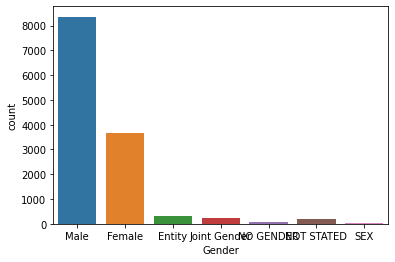

In [131]:
sns.countplot(df['Gender'])

In [132]:
#replacing the mislabelld gender categories

df["Gender"]= df["Gender"].replace({"Entity":"Others","Joint Gender":"Others",
                                                              "NO GENDER":"Others","NOT STATED":"Others","SEX":"Others"},)

In [133]:
#to fill the missing value
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Gender'].isna().sum()

0

<AxesSubplot:xlabel='Gender', ylabel='count'>

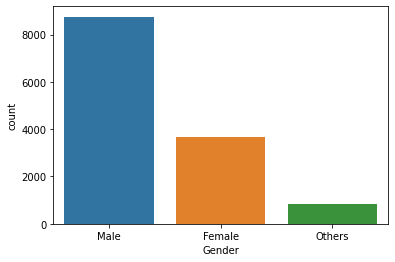

In [134]:
sns.countplot(df['Gender'])

In [135]:
#to check for the corrected categories

df.Gender.unique()

array(['Male', 'Female', 'Others'], dtype=object)

In [136]:
#2. Car_Category

df.Car_Category.unique()

array(['Saloon', 'JEEP', nan, 'Motorcycle', 'Truck', 'Bus', 'Mini Bus',
       'Pick Up', 'Mini Van', 'Van', 'Pick Up > 3 Tons', 'CAMRY CAR HIRE',
       'Wagon', 'Shape Of Vehicle Chasis', 'Sedan', 'Station 4 Wheel',
       'Tipper Truck'], dtype=object)

In [137]:
#replacing the mislabelld categories
df["Car_Category"] = df["Car_Category"].replace({'JEEP':'Jeep','Pick Up > 3 Tons':'Pick Up','Station 4 Wheel':'Truck','Tipper Truck':'Truck',
                                                                           "Mini Van":"Van", "CAMRY CAR HIRE":'Saloon',"Mini Bus":"Bus",
                                                                           "Shape Of Vehicle Chasis":np.nan})

In [138]:
#to check for the corrected categories
df.Car_Category.unique()

array(['Saloon', 'Jeep', nan, 'Motorcycle', 'Truck', 'Bus', 'Pick Up',
       'Van', 'Wagon', 'Sedan'], dtype=object)

In [139]:
df['Car_Category'].value_counts()

Saloon        6634
Jeep          2223
Truck          115
Bus            101
Pick Up         34
Motorcycle      18
Van             16
Sedan           14
Wagon           10
Name: Car_Category, dtype: int64

In [140]:
df['Car_Category'].isna().sum()

4116

In [141]:
#  Cleaning Subject_Car_Colour Column.


car_color_map = {'Black & Orange':'Black', 'Black & White':'Black','As Attached': 'Black', 'Ash':'Grey',
                'Gray & Gray':'Grey','Gray & Silver':'Grey', 'Dark Grey':'Grey', 'Dark Gray':'Grey', 'Light Gray':'Grey',
                'Wine':'Red','Red & Blue':'Red','Red & Yellow':'Red','Red & White':'Red','Red & Black':'Red','D. Red':'Red',
                'Dark Red':'Red','Burgundy':'Red','Red Maroon':'Red','Blue & Red':'Blue','Light Blue':'Blue','Blue&White&Red':'Blue',
                'Dark Blue':'Blue','Blue Sky':'Blue','B.Silver':'Silver','Light Green':'Green','Dark Green':'Green',
                'White & Red':'White','White & Blue':'White','White & Yellow':'White','D. Gold':'Gold','Champagne':'Gold',
                'Cream':'Gold','Beige Mitalic':'Gold','Yellow & White':'Yellow'} 

df['Subject_Car_Colour'] = df['Subject_Car_Colour'].replace(car_color_map)

df['Subject_Car_Colour'].unique()


array(['Black', 'Grey', 'Red', nan, 'Blue', 'Silver', 'Green', 'White',
       'Brown', 'Gold', 'Orange', 'Purple', 'Yellow'], dtype=object)

<AxesSubplot:xlabel='Subject_Car_Colour', ylabel='count'>

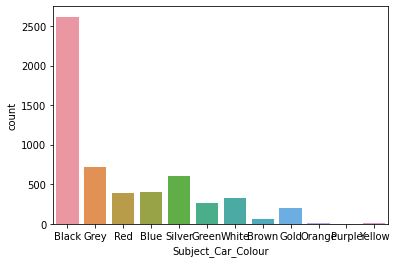

In [142]:
sns.countplot(df['Subject_Car_Colour'])

In [143]:
df['Subject_Car_Colour'].value_counts()

Black     2616
Grey       722
Silver     609
Blue       406
Red        389
White      329
Green      263
Gold       205
Brown       65
Yellow       9
Orange       5
Purple       4
Name: Subject_Car_Colour, dtype: int64

In [115]:
car_make_map = {'Innson':'Innoson', 'Rols Royce':'Rolls Royce','Wrangler Jeep': 'Jeep Wrangler', 'Caddillac':'Cadillac',
                'Buik':'Buick','Land Rover.':'Land Rover','As Attached': np.nan,'.': np.nan}

df['Subject_Car_Make'] = df['Subject_Car_Make'].replace(car_make_map)
df['Subject_Car_Make'].unique()

array(['TOYOTA', nan, 'REXTON', 'Lexus', 'Hyundai', 'Iveco', 'DAF',
       'Honda', 'Mercedes', 'Jincheng', 'ACURA', 'Ford', 'Volkswagen',
       'Nissan', 'Pontiac', 'Range Rover', 'Kia', 'Mitsubishi', 'Scania',
       'BMW', 'Infiniti', 'Renault', 'Volvo', 'Hummer', 'Mack',
       'Grand Cherokee', 'Porsche', 'Peugeot', 'Land Rover', 'Chevrolet',
       'Mazda', 'Man', 'Jeep', 'Audi', 'Suzuki', 'MINI COOPER', 'KA',
       'Innoson', 'Isuzu', 'Skoda', 'Jaguar', 'Chrysler', 'Dodge', 'GMC',
       'Subaru', 'GAC', 'Fiat', 'Opel', 'Astra', 'Motorcycle', 'ZOYTE',
       'Seat', 'FOTON', 'Howo', 'Lincoln', 'Rolls Royce', 'CHANGAN',
       'LIBERTY', 'ABG', 'Yamaha', 'Black', 'Tata', 'Ashok Leyland',
       'Geely', 'Cadillac', 'Jeep Wrangler', 'Raston', 'MG', 'BRILLIANCE',
       'Buick', 'COMMANDER', 'Bajaj', 'Datsun'], dtype=object)

In [74]:
#5.LGA_Name

df.LGA_Name.unique()

array([nan, 'Lagos', 'Ikeja', 'Badagry', 'Eti-Osa', 'Victoria Island',
       'Ikoyi', 'Lagos Mainland', 'EFFURUN', 'Abeokuta',
       'Abuja Municipal', 'Yaba', 'Aguda', 'Surulere', 'Oshodi-Isolo',
       'Alimosho', 'Okpe, Delta State', 'Asaba', 'IbadanCentral', 'Lekki',
       'Ibeju/Lekki', 'OBANIKORO', 'Agege', 'ISHERI', 'Kosofe', 'OGUN',
       'Apapa', 'Ibadan South West', 'Obia/Akpor', 'Ibadan South East',
       'Sapele', 'Kaduna South', 'Ikorodu', 'Amuwo-Odofin', 'Awka',
       'GBAGADA', 'Port Harcourt', 'Minna', 'Shomolu', 'Benin',
       'Lagos Island', 'Central', 'Ebute-Metta', 'Ketu', 'Uyo', 'Mushin',
       'Katagum', 'ENUGU EAST', 'Oredo', 'Abuja', 'Festac', 'Ipaja',
       'Zaria ', 'Esan West', 'Oluyole', 'Bwari', 'Obafemi-Owode', 'LGA',
       'Orile-Iganmu', 'Egbeda', 'Ido', 'Ifako-Ijaye ', 'Ibadan North',
       'Oguta', 'Jos North', 'Ajah', 'Ondo West', 'Kaduna North', 'Warri',
       'Aniocha South', 'Owerri', 'Awka South', 'Asokoro District',
       'Ile-Oluji'

In [75]:
#tranforming the uppercases to match with the rest

df["LGA_Name"]= df["LGA_Name"].str.title()

In [76]:
df.LGA_Name.unique()

array([nan, 'Lagos', 'Ikeja', 'Badagry', 'Eti-Osa', 'Victoria Island',
       'Ikoyi', 'Lagos Mainland', 'Effurun', 'Abeokuta',
       'Abuja Municipal', 'Yaba', 'Aguda', 'Surulere', 'Oshodi-Isolo',
       'Alimosho', 'Okpe, Delta State', 'Asaba', 'Ibadancentral', 'Lekki',
       'Ibeju/Lekki', 'Obanikoro', 'Agege', 'Isheri', 'Kosofe', 'Ogun',
       'Apapa', 'Ibadan South West', 'Obia/Akpor', 'Ibadan South East',
       'Sapele', 'Kaduna South', 'Ikorodu', 'Amuwo-Odofin', 'Awka',
       'Gbagada', 'Port Harcourt', 'Minna', 'Shomolu', 'Benin',
       'Lagos Island', 'Central', 'Ebute-Metta', 'Ketu', 'Uyo', 'Mushin',
       'Katagum', 'Enugu East', 'Oredo', 'Abuja', 'Festac', 'Ipaja',
       'Zaria ', 'Esan West', 'Oluyole', 'Bwari', 'Obafemi-Owode', 'Lga',
       'Orile-Iganmu', 'Egbeda', 'Ido', 'Ifako-Ijaye ', 'Ibadan North',
       'Oguta', 'Jos North', 'Ajah', 'Ondo West', 'Kaduna North', 'Warri',
       'Aniocha South', 'Owerri', 'Awka South', 'Asokoro District',
       'Ile-Oluji'

In [77]:
#6.State

df.State.unique()

array([nan, 'Lagos', 'Benue', 'Eti-Osa', 'Delta', 'Ogun',
       'Abuja-Municipal', 'Oshodi-Isolo', 'Ibeju-Lekki', 'Ibadan-West',
       'Obia-Akpor', 'Ibadan-East', 'Kaduna-South', 'Amuwo-Odofin',
       'Anambra', 'Rivers', 'Niger-State', 'Edo', 'Akwa-Ibom',
       'ENUGU-EAST', 'Abuja', 'Kaduna', 'Esan-West', 'Obafemi-Owode',
       'Orile-Iganmu', 'Ifako-Ijaye', 'Ibadan-North', 'Imo', 'Jos-North',
       'Ondo-West', 'Kaduna-North', 'Aniocha-South', 'Awka-South',
       'Ile-Oluji', 'Ijebu-Ode', 'Port-Harcourt', 'Nnewi-North',
       'Aboh-Mbaise', 'Oyo', 'Akoko-West', 'Warri-Central', 'Cross-River',
       'Jos-South', 'Onitsha-North', 'Osun', 'Ajeromi-Ifelodun',
       'Kano-Municipal', 'Ife-Central', 'Ilorin-West', 'Lagelu-North',
       'Owerri-Municipal', 'Nsit-Ubium', 'Udi-Agwu', 'Essien-Udim',
       'Owerri-West', 'Ondo', 'Ogbmosho-South', 'Umuahia-South',
       'ABULE-EGBA', 'Enugu-North', 'Ovia-SouthWest', 'Kebbi',
       'Ajegunle-State', 'Ekiti-West', 'Ogun-Waterside',

In [78]:
#tranforming the uppercases to match with the rest

df["State"]= df["State"].str.title()

In [116]:
#7. ProductName

df.ProductName.unique()

array(['Car Classic', 'CarSafe', 'Muuve', 'CVTP', 'Car Plus',
       'Motor Cycle', 'Customized Motor', 'CarFlex', 'Car Vintage'],
      dtype=object)

Handling The Missing Values

In [144]:
df['Subject_Car_Colour'].value_counts()

Black     2616
Grey       722
Silver     609
Blue       406
Red        389
White      329
Green      263
Gold       205
Brown       65
Yellow       9
Orange       5
Purple       4
Name: Subject_Car_Colour, dtype: int64

In [145]:
# "Subject_Car_Colour"

df["Subject_Car_Colour"] = df["Subject_Car_Colour"].fillna(method = "bfill")


In [146]:
df["Subject_Car_Colour"].value_counts()

Black     6151
Grey      1689
Silver    1413
Red       1005
Blue      1000
White      756
Green      585
Gold       480
Brown      152
Yellow      28
Orange      14
Purple       8
Name: Subject_Car_Colour, dtype: int64

In [147]:
df["Subject_Car_Make"].value_counts()

TOYOTA       5466
Honda        1146
Lexus         654
Mercedes      577
Hyundai       512
             ... 
Caddillac       1
Geely           1
ZOYTE           1
Bajaj           1
Datsun          1
Name: Subject_Car_Make, Length: 75, dtype: int64

In [148]:
# "Subject_Car_Make"

df["Subject_Car_Make"] = df["Subject_Car_Make"].fillna(method = "bfill")

In [149]:
df["Subject_Car_Make"].value_counts()

TOYOTA       6870
Honda        1440
Lexus         820
Mercedes      735
Hyundai       651
             ... 
Howo            1
Caddillac       1
MG              1
Buik            1
Datsun          1
Name: Subject_Car_Make, Length: 75, dtype: int64

In [ ]:
#to re-inspect our dataset
df.info()

In [151]:
df.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target'],
      dtype='object')

In [152]:
df['Car_Category'].unique()

array(['Saloon', 'Jeep', nan, 'Motorcycle', 'Truck', 'Bus', 'Pick Up',
       'Van', 'Wagon', 'Sedan'], dtype=object)

# Normalisation and Standardisation

Feature transformation

In [ ]:
#Feature transformation involves working through our data 
#to inspect for the following:

#1. Varying SCALES across the features in our data
#2. Inspecting the standard error in each feature and 
#across our features.
#3. Checking for non-normal distribution in our data

In [ ]:
#conducting a general inspection of the behavior of 
#our data

df.describe().T

Visual Inspection of our data

In [ ]:
df.Age.plot(kind="density");

#the distribution below is abnormal

In [ ]:
df.No_Pol.plot(kind="density");

#the distribution below is abnormal

In [ ]:
df.target.plot(kind="density");

#the distribution below is abnormal